49152


C:\Users\NSW00_009821\AppData\Local\Temp\ipykernel_18672\3471003568.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


True

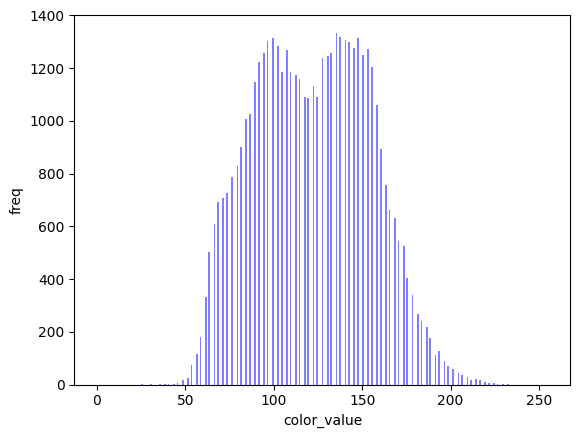

In [1]:
#21
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori_dark.jpg")

row, col, bgr = img.shape
b = np.ravel(img[:, :, 0])
g = np.ravel(img[:, :, 1])
r = np.ravel(img[:, :, 2])

bgr = []
bgr = np.append(bgr, b)
bgr = np.append(bgr, g)
bgr = np.append(bgr, r)

val_min = 50
val_max = 150
range_min = 0
range_max = 255
print(len(bgr))


for i in range(len(bgr)):
    if bgr[i] < val_min:
        bgr[i] = range_min
    
    elif bgr[i] > val_min and bgr[i] < val_max:
        bgr[i] = ((range_max - range_min)/(val_max - val_min)) * (bgr[i] - val_min) + range_min

    else :
        bgr[i] = range_max



fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(bgr, bins=255, color='blue', range=(0,255), alpha=0.5)

ax.set_xlabel('color_value')
ax.set_ylabel('freq')

fig.savefig("answers/img_normalization_hist.jpg")
fig.show()

b_re = bgr[:int(len(bgr) / 3)]
g_re = bgr[int(len(bgr) / 3) : int(len(bgr) * 2 / 3)] 
r_re = bgr[int(len(bgr) * 2 / 3) : ]

img[:, :, 0] = b_re.reshape([128, 128])
img[:, :, 1] = g_re.reshape([128, 128])
img[:, :, 2] = r_re.reshape([128, 128])

cv2.imwrite("answers/img_normalization.jpg", img)

C:\Users\NSW00_009821\AppData\Local\Temp\ipykernel_18672\3971864763.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


True

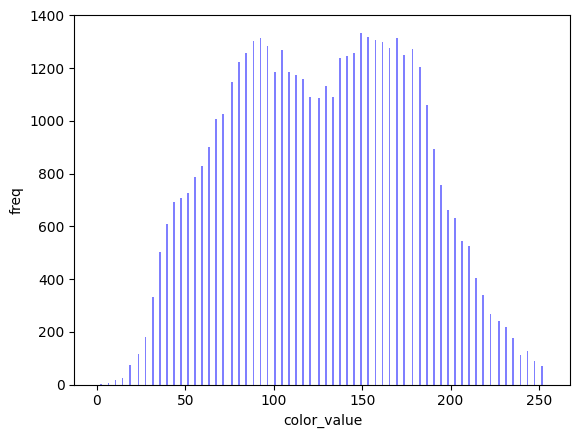

In [3]:
#22
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori_dark.jpg")

row, col, bgr = img.shape
b = np.ravel(img[:, :, 0])
g = np.ravel(img[:, :, 1])
r = np.ravel(img[:, :, 2])

bgr = []
bgr = np.append(bgr, b)
bgr = np.append(bgr, g)
bgr = np.append(bgr, r)

m = np.mean(bgr)
s = np.std(bgr)
m_0 = 128
s_0 = 52

for i in range(len(bgr)):
    bgr[i] = (s_0/s) * (bgr[i] - m) +m_0 



fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(bgr, bins=255, color='blue', range=(0,255), alpha=0.5)

ax.set_xlabel('color_value')
ax.set_ylabel('freq')

fig.savefig("answers/img_ctl_hist.jpg")
fig.show()

b_re = bgr[:int(len(bgr) / 3)]
g_re = bgr[int(len(bgr) / 3) : int(len(bgr) * 2 / 3)] 
r_re = bgr[int(len(bgr) * 2 / 3) : ]

img[:, :, 0] = b_re.reshape([128, 128])
img[:, :, 1] = g_re.reshape([128, 128])
img[:, :, 2] = r_re.reshape([128, 128])

cv2.imwrite("answers/img_ctl.jpg", img)

In [ ]:
#23
### I cannot see why unexperiment to move ###
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg")
tmp = img.copy()

row, col, bgr = img.shape
b = np.ravel(img[:, :, 0])
g = np.ravel(img[:, :, 1])
r = np.ravel(img[:, :, 2])

bgr = []
bgr = np.append(bgr, b)
bgr = np.append(bgr, g)
bgr = np.append(bgr, r)


S = bgr.size
bgr_max = np.max(bgr)
print(bgr.size)
sum_bgr_count = 0

for i in range(256):
    point = np.where(bgr==i)
    sum_bgr_count += len(bgr[point])
    bgr[i] = (bgr_max / S) * sum_bgr_count


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(bgr, bins=255, color='blue', range=(0,255), alpha=0.5)

ax.set_xlabel('color_value')
ax.set_ylabel('freq')

fig.savefig("answers/img_equalization_hist.jpg")
fig.show()

b_re = bgr[:int(len(bgr) / 3)]
g_re = bgr[int(len(bgr) / 3) : int(len(bgr) * 2 / 3)] 
r_re = bgr[int(len(bgr) * 2 / 3) : ]

tmp[:, :, 0] = b_re.reshape([128, 128])
tmp[:, :, 1] = g_re.reshape([128, 128])
tmp[:, :, 2] = r_re.reshape([128, 128])

cv2.imwrite("answers/img_equalization.jpg", tmp)

C:\Users\NSW00_009821\AppData\Local\Temp\ipykernel_18672\269788543.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


True

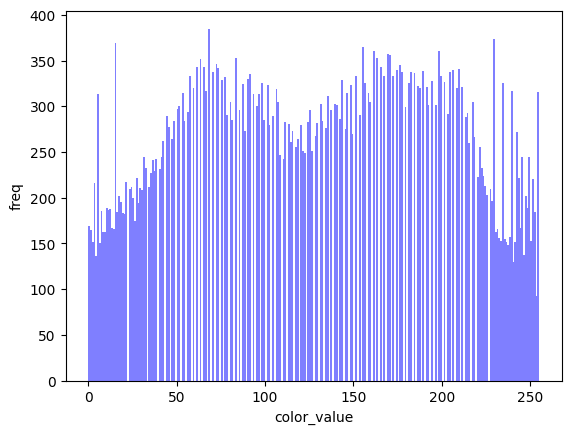

In [41]:
#23
### Here is correct ### 
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg")
tmp = img.copy()

row, col, bgr = img.shape

S = row * col * bgr
bgr_max = 255
sum_count = 0

for i in range(256):
    point = np.where(img==i)
    sum_count += len(img[point])
    tmp[point] = (bgr_max / S) * sum_count

tmp = tmp.astype(np.uint8)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(tmp.ravel(), bins=255, color='blue', range=(0,255), alpha=0.5)

ax.set_xlabel('color_value')
ax.set_ylabel('freq')

fig.savefig("answers/img_equalization_hist.jpg")
fig.show()

cv2.imwrite("answers/img_equalization.jpg", tmp)

C:\Users\NSW00_009821\AppData\Local\Temp\ipykernel_18672\1476687422.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


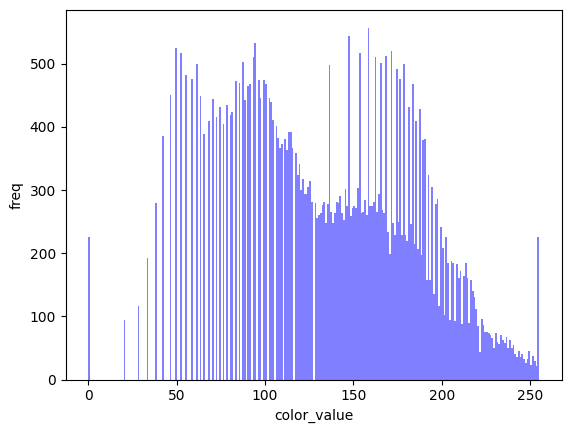

In [59]:
#24
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori_gamma.jpg")

row, col, bgr = img.shape

gamma = 2.2
c = 1

tmp = img.copy().astype(np.float64)
tmp /= 255.
tmp= ((1/c) * tmp) ** (1/gamma)
tmp *= 255.
tmp = tmp.astype(np.uint8)

cv2.imwrite("answers/img_gamma.jpg", tmp)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(tmp.ravel(), bins=255, color='blue', range=(0,255), alpha=0.5)

ax.set_xlabel('color_value')
ax.set_ylabel('freq')

fig.savefig("answers/img_gamma_hist.jpg")
fig.show()



In [68]:
#25
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg")

row, col, bgr = img.shape

img_resize = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_NEAREST)

cv2.imwrite("answers/img_nearest.jpg", img_resize)

True

In [69]:
#26
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg")

row, col, bgr = img.shape

img_resize = cv2.resize(img, None, fx=1.5, fy=1.5)

cv2.imwrite("answers/img_bi_liner.jpg", img_resize)

True

In [71]:
#27
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg")

row, col, bgr = img.shape

print(img.shape)
img_resize = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
print(img_resize.shape)

cv2.imwrite("answers/img_cubic.jpg", img_resize)

(128, 128, 3)
(192, 192, 3)


True

In [ ]:
#28
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg")

row, col, bgr = img.shape

t_x = 30
t_y = -30

matrix = np.float32([[1, 0, t_x],  [0, 1, t_y]])
img_resize1 = cv2.warpAffine(img, matrix, (row, col))

cv2.imwrite("answers/img_affine_aspect.jpg", img_resize1)

In [79]:
#29
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg")

row, col, bgr = img.shape

t_x = 30
t_y = -30

matrix1 = np.float32([[1.3, 0, 0],  [0, 0.8, 0]])
matrix2 = np.float32([[1.3, 0, t_x],  [0, 0.8, t_y]])
img_resize1 = cv2.warpAffine(img, matrix1, (row, col))
img_resize2 = cv2.warpAffine(img, matrix2, (row, col))

cv2.imwrite("answers/img_affine_aspect.jpg", img_resize1)
cv2.imwrite("answers/img_affine_aspect_slide.jpg", img_resize2)

True

In [89]:
#30
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg")

row, col, bgr = img.shape

rad = (np.pi/6)*(-1)
r_x = row / 2
r_y = col / 2
t_x = r_x * (1.0 - np.cos(rad)) + r_y * np.sin(rad)
t_y = r_y * (1.0 - np.cos(rad)) - r_x * np.sin(rad)

matrix1 = np.float32([[np.cos(rad), (-1)*np.sin(rad), 0],  [np.sin(rad), np.cos(rad), 0]])
matrix2 = np.float32([[np.cos(rad), (-1)*np.sin(rad), t_x],  [np.sin(rad), np.cos(rad), t_y]])
img_resize1 = cv2.warpAffine(img, matrix1, (row, col))
img_resize2 = cv2.warpAffine(img, matrix2, (row, col))

cv2.imwrite("answers/img_rotate.jpg", img_resize1)
cv2.imwrite("answers/img_rotate_center.jpg", img_resize2)

True